![](https://studyabroad.shiksha.com/mediadata/images/articles/whats-your-score-picture-id1149909794.jpg)

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading data
data = pd.read_csv('../input/student-study-hour-v2/Student Study Hour V2.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   28 non-null     float64
 1   Scores  28 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [4]:
# Structure of data
data.shape

(28, 2)

In [5]:
# Detailed View of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,28.0,4.832143,2.530562,1.1,2.675,4.65,7.025,9.2
Scores,28.0,49.964286,25.041421,17.0,29.250,44.50,70.500,95.0


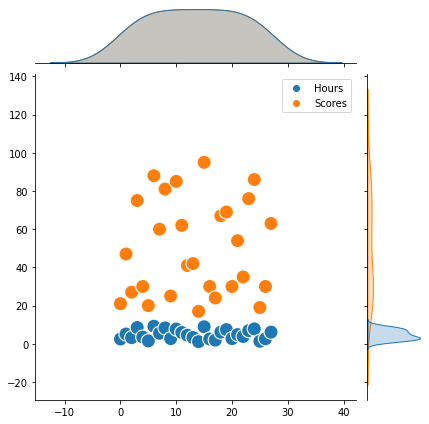

In [6]:
sns.jointplot(data=data, s=200)
plt.show()

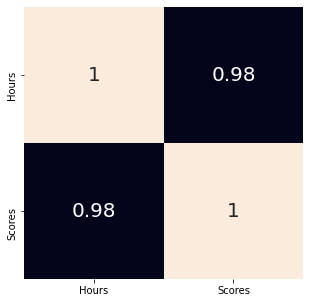

In [7]:
# Correlation of data
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), cbar=False, annot=True, annot_kws={'fontsize':20})
plt.show()

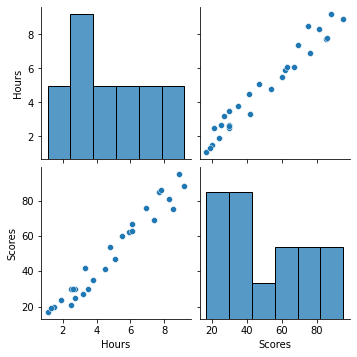

In [8]:
sns.pairplot(data)
plt.show()

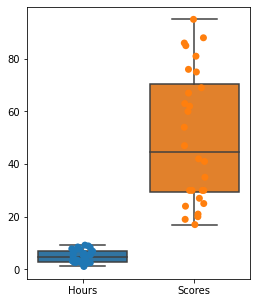

In [9]:
plt.figure(figsize=(4,5))
sns.boxplot(data=data)
sns.stripplot(data=data, s=7)
plt.show()

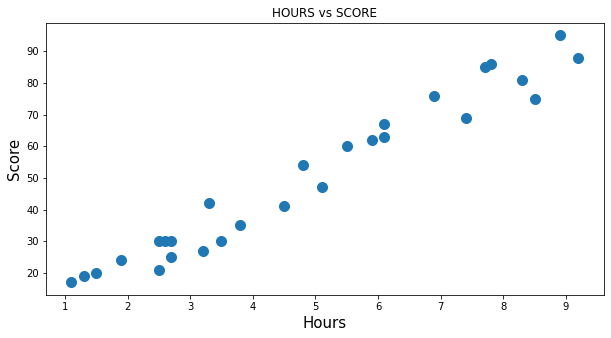

In [10]:
# Plotting data distribution
plt.figure(figsize=(10,5))
plt.title('HOURS vs SCORE')
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.scatter(data.Hours, data.Scores, s=100)
plt.show()

## Simple Linear Regression

In [11]:
# importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
# Predictor & Target
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print('X:', X.shape)
print('y:', y.shape)

X: (28, 1)
y: (28,)


In [13]:
# Spliting into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Structure of each set in Train & Test data
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (22, 1)
X_test: (6, 1)
y_train: (22,)
y_test: (6,)


In [15]:
# Modeling & Fitting
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [16]:
# Coefficient & Intercept
print('Coefficient:', lreg.coef_)
print('Intercept:', lreg.intercept_)

Coefficient: [9.72743538]
Intercept: 3.0516076458395958


In [17]:
# Making Predictions
y_pred = lreg.predict(X_test).astype(int)

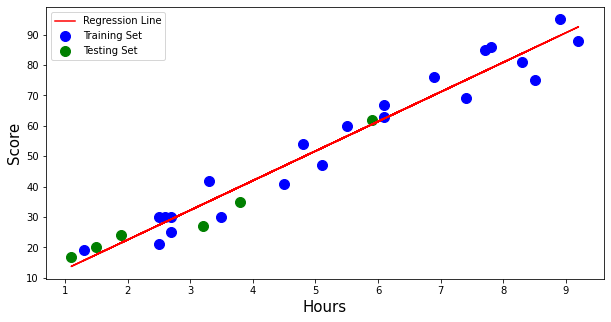

In [18]:
# Plotting Regression Line 
plt.figure(figsize=(10, 5))
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.scatter(X_train, y_train, s=100, color='blue')
plt.scatter(X_test, y_test, s=100, color='green')
plt.plot(X, lreg.predict(X), color='red')
plt.legend(['Regression Line','Training Set', 'Testing Set'])
plt.show()

In [19]:
prediction = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
prediction

,Actual Score,Predicted Score
0,27,34
1,35,40
2,17,13
3,24,21
4,20,17
5,62,60


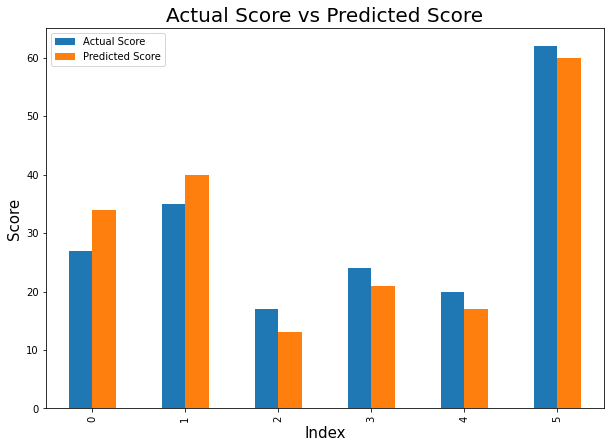

In [20]:
prediction.plot(kind='bar', figsize=(10,7))
plt.title('Actual Score vs Predicted Score', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()

In [21]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4.0
Residual Sum of Squares(MSE): 18.666666666666668
R2-Score: 0.9175763522629707


## Thank You!